In [17]:
import numpy as np
from tqdm import tqdm as tqdm
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from LyftDataset import LyftDataset, LyftDatasetExplorer
from Box import Box
from PointCloud import PointCloud, RadarPointCloud, LidarPointCloud

In [18]:
# Data path
DATA_PATH = '../Datasets/Lyft-kaggle/'

# Initialize dataset
lyft_dataset = LyftDataset(data_path=DATA_PATH, json_path=DATA_PATH+'train_data')

# select scene
my_scene = lyft_dataset.scene[0]
my_sample_token = my_scene["first_sample_token"]
my_sample = lyft_dataset.get('sample', my_sample_token)

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 8.7 seconds.
Reverse indexing ...
Done reverse indexing in 2.6 seconds.


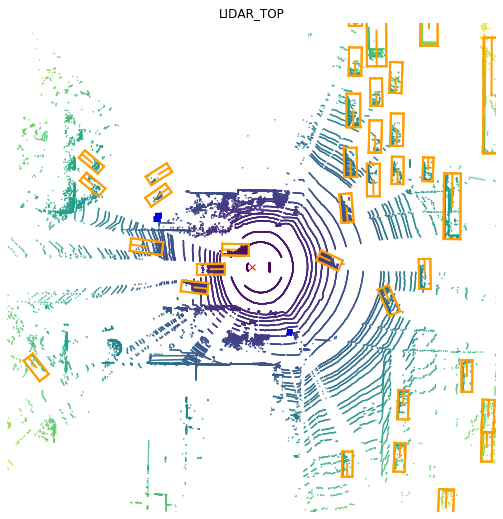

In [19]:
# render top view from lidar
lyft_dataset.render_sample_data(my_sample['data']['LIDAR_TOP'], nsweeps=1)

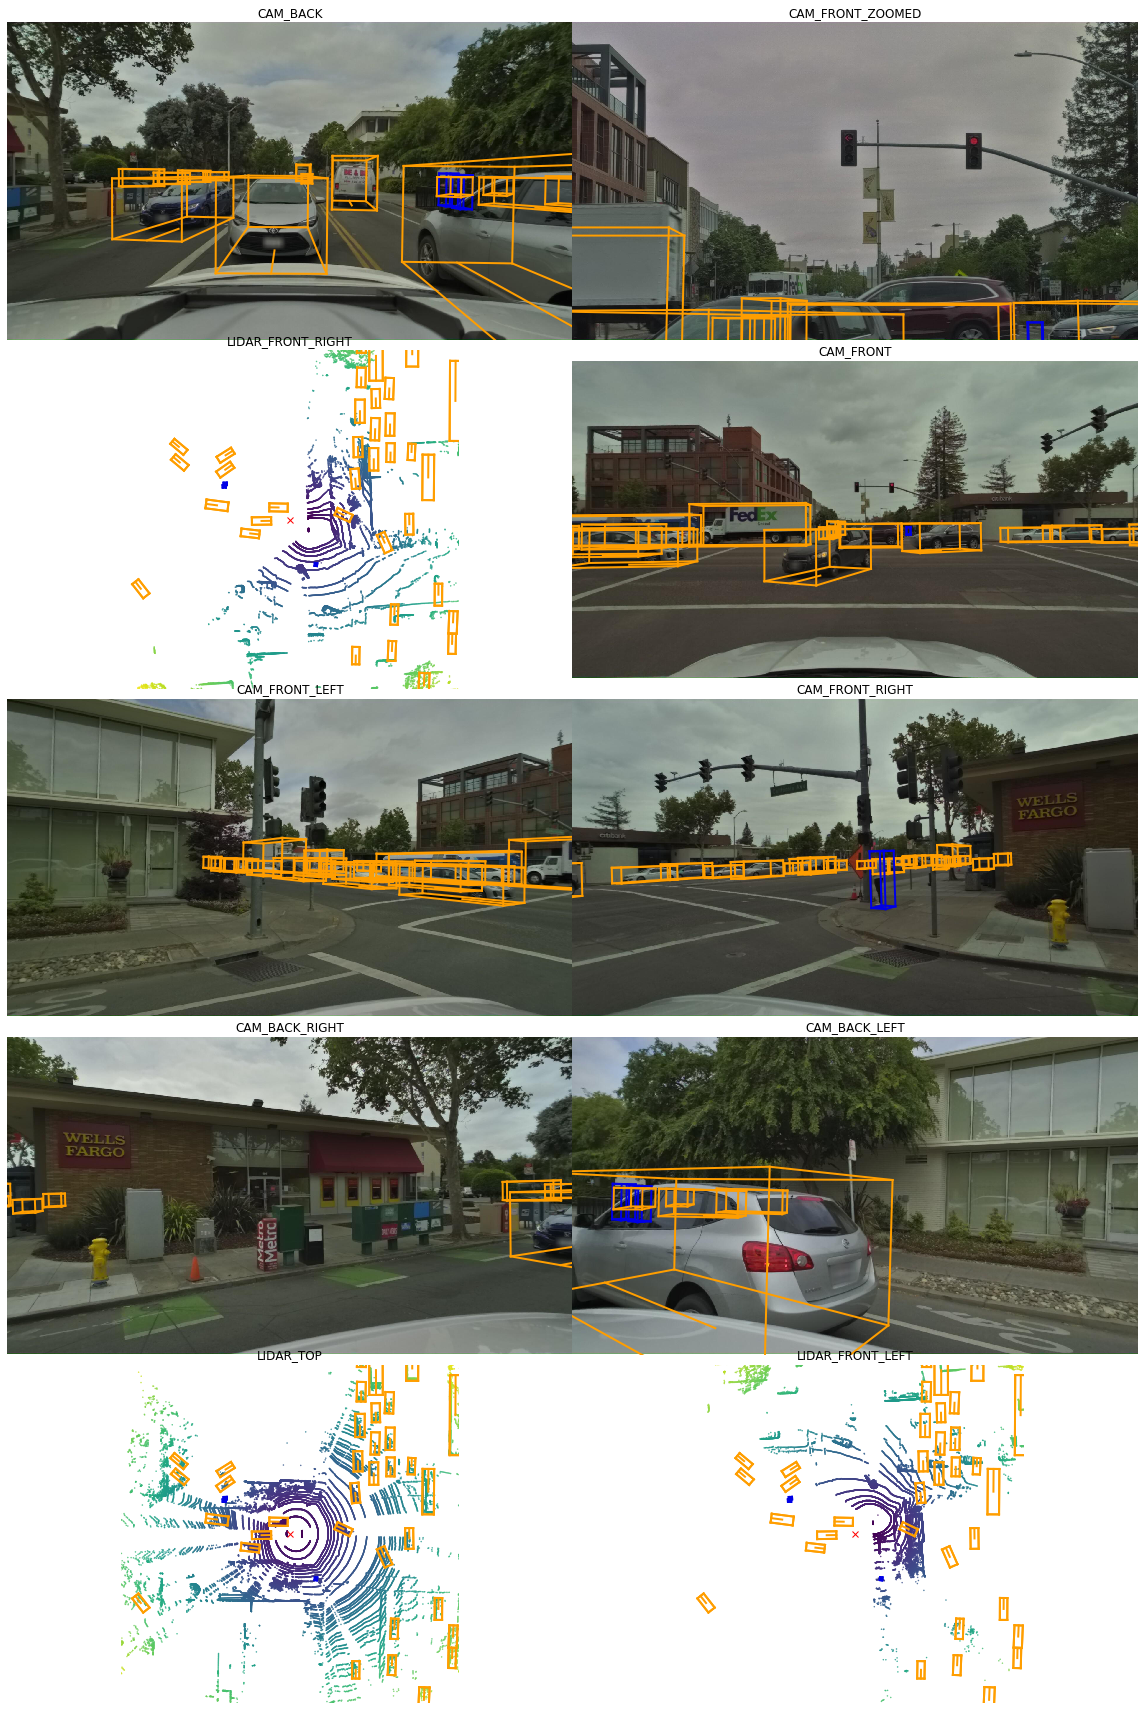

In [20]:
# render all camera views and lidar
lyft_dataset.render_sample(my_sample_token)

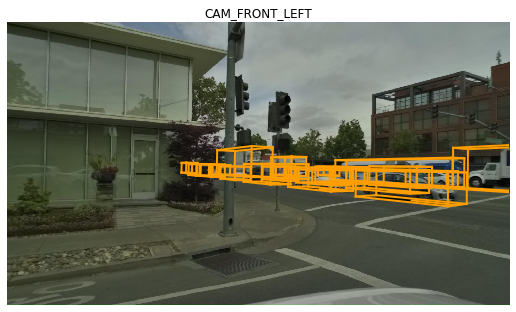

In [21]:
# render just one of the camera views
sensor_channels = ["CAM_FRONT_LEFT", "CAM_FRONT", "CAM_FRONT_RIGHT", "CAM_BACK_LEFT", "CAM_BACK", "CAM_BACK_RIGHT"]
sensor_channel = np.random.choice(sensor_channels)
my_sample_data = lyft_dataset.get('sample_data', my_sample['data'][sensor_channel])
lyft_dataset.render_sample_data(my_sample_data['token'])

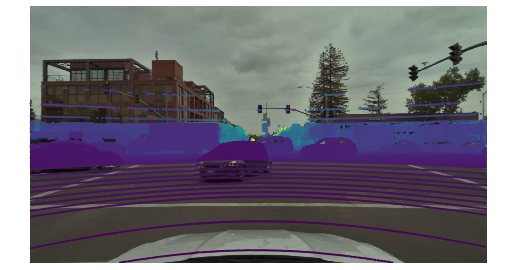

In [22]:
# render point cloud on the image
lyft_dataset.render_pointcloud_in_image(sample_token = my_sample["token"],
                                        dot_size = 1,
                                        camera_channel = 'CAM_FRONT')

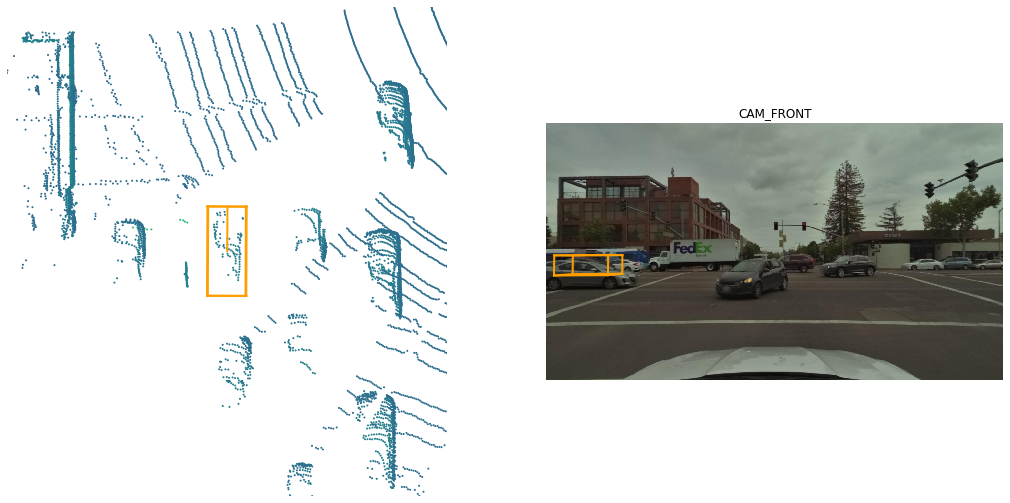

In [23]:
# render views with an specefic anotation
my_annotation_token = my_sample['anns'][10]
my_annotation =  my_sample_data.get('sample_annotation', my_annotation_token)
lyft_dataset.render_annotation(my_annotation_token)

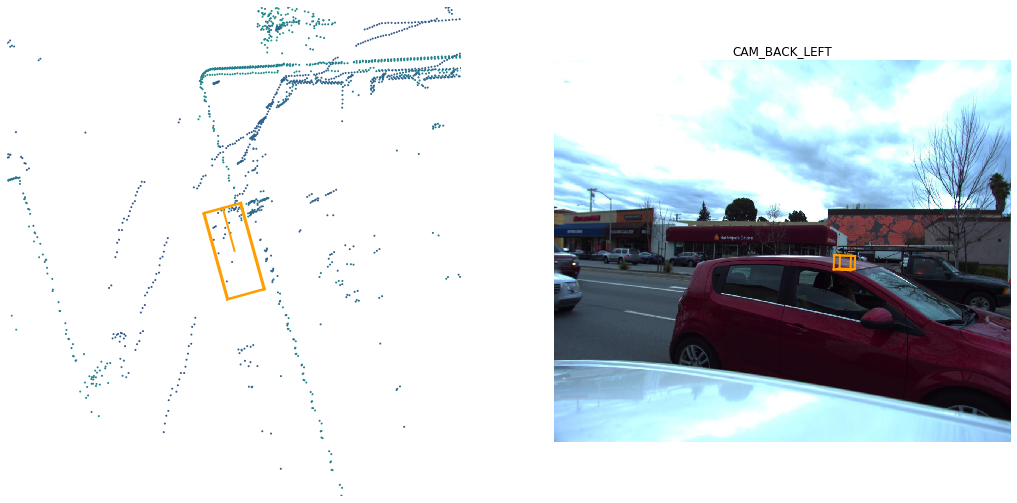

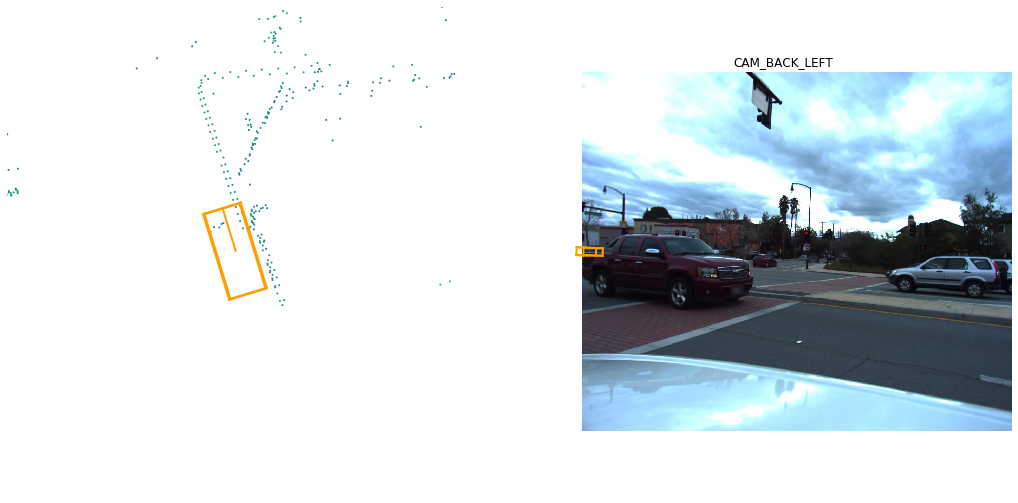

In [24]:
# renders (annotation's) instance
my_instance = lyft_dataset.instance[100]
instance_token = my_instance['token']
lyft_dataset.render_instance(instance_token)  # instance rendering
lyft_dataset.render_annotation(my_instance['last_annotation_token'])  # annotation rendering

In [25]:
from IPython.display import HTML

anim = lyft_dataset.animate_images(scene=0, frames=50, interval=1)
HTML(anim.to_jshtml(fps=8))

AttributeError: 'LyftDataset' object has no attribute 'animate_images'